# Estimate of New Cars Miles Travelled Based on Make/Model 

In [336]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [337]:
print(pd.__version__)
%whos

1.1.3
Variable                        Type           Data/Info
--------------------------------------------------------
Average_Total_Miles_Annually    int            7600
Average_Total_Miles_Quarterly   int            1900
Complete_Car                    DataFrame                Make           <...>[47825 rows x 86 columns]
Complete_Car1                   DataFrame                Make         Mo<...>[31700 rows x 24 columns]
Covid_19                        DataFrame             Date   Cars\n0    <...>n\n[261 rows x 2 columns]
Electric                        DataFrame                 Make    Model <...>\n[1448 rows x 3 columns]
Fuel_Type                       DataFrame                Make           <...>n[50674 rows x 3 columns]
Generic_Make_Model              DataFrame                Generic model 1<...>n[3054 rows x 87 columns]
ICE                             DataFrame                Make           <...>n[45966 rows x 3 columns]
ICE_BEV                         DataFrame              

In [339]:
pwd

'C:\\Projects\\Make_Model'

In [338]:
import os
os.chdir("C:\Projects\Make_Model")

# Generic Make Model

In this section, I explore how the trend of total licenced cars by Generic Name has changed overtime. The findings suggest a consistent and steep decrease in the amount of licenced vehicles throughout the timeperiod considered.
However this does not estimate total miles driven and is total licenced cars rather than new licenced cars. 

In [340]:
Generic_Make_Model = pd.read_csv('veh0128_Generic.csv', skiprows= range(0,6), skipfooter=10)
Generic_Make_Model

<ipython-input-340-deea7c178c96>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  Generic_Make_Model = pd.read_csv('veh0128_Generic.csv', skiprows= range(0,6), skipfooter=10)


,Generic model 1,2020 Q2 UK,2020 Q1 UK,2019 Q4 UK,2019 Q3 UK,2019 Q2 UK,2019 Q1 UK,2018 Q4 UK,2018 Q3 UK,2018 Q2 UK,...,2003 Q4,2002 Q4,2001 Q4,2000 Q4,1999 Q4,1998 Q4,1997 Q4,1996 Q4,1995 Q4,1994 Q4
0,FORD FIESTA,1529133.0,1536210.0,1546591.0,1549078.0,1545837.0,1542884.0,1538992.0,1536370.0,1531388.0,...,1366327.0,1431240.0,1489086.0,1524411.0,1582053.0,1619815.0,1651303.0,1650613.0,1589572.0,1581488.0
1,FORD FOCUS,1209166.0,1221417.0,1238969.0,1255463.0,1269735.0,1283761.0,1297798.0,1312500.0,1329887.0,...,614317.0,493552.0,349616.0,211291.0,99785.0,8314.0,NaN,NaN,NaN,NaN
2,VAUXHALL CORSA,1061639.0,1071168.0,1084776.0,1094363.0,1097295.0,1103550.0,1109625.0,1116179.0,1120640.0,...,815435.0,731515.0,635378.0,552855.0,472951.0,393770.0,325310.0,252459.0,181668.0,117057.0
3,VOLKSWAGEN GOLF,1051995.0,1056131.0,1063863.0,1069865.0,1068779.0,1066918.0,1065866.0,1073075.0,1074448.0,...,729232.0,708212.0,667024.0,626880.0,591510.0,549996.0,534357.0,515333.0,478543.0,460820.0
4,VAUXHALL ASTRA,861701.0,875170.0,896802.0,911911.0,925041.0,941634.0,955185.0,964864.0,979250.0,...,1092878.0,1099442.0,1092754.0,1086005.0,1079677.0,1057653.0,1050962.0,1013186.0,971010.0,930412.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3049,YUAN SJ 125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3050,ZASTAVA ZLC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,4.0,6.0,9.0,15.0,26.0,40.0,66.0
3051,ZASTAVA ZLM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,2.0,11.0,18.0,28.0,57.0,103.0
3052,ZASTAVA ZLX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,2.0,3.0,4.0,6.0,10.0,15.0,16.0,35.0,50.0


In [211]:
No_NA = Generic_Make_Model.dropna()
sum_matrix = No_NA.drop(["Generic model 1"],axis = 1)
sum_matrix = sum_matrix.drop(sum_matrix.iloc[: , 24:86], axis = 1) 
print(sum_matrix.dtypes)

2020 Q2 UK    float64
2020 Q1 UK    float64
2019 Q4 UK    float64
2019 Q3 UK    float64
2019 Q2 UK    float64
2019 Q1 UK    float64
2018 Q4 UK    float64
2018 Q3 UK    float64
2018 Q2 UK    float64
2018 Q1 UK    float64
2017 Q4 UK    float64
2017 Q3 UK    float64
2017 Q2 UK    float64
2017 Q1 UK    float64
2016 Q4 UK    float64
2016 Q3 UK    float64
2016 Q2 UK    float64
2016 Q1 UK    float64
2015 Q4 UK    float64
2015 Q3 UK    float64
2015 Q2 UK    float64
2015 Q1 UK    float64
2014 Q4 UK    float64
2014 Q3 UK    float64
dtype: object


In [341]:
sum_matrix2 = sum_matrix.sum(axis = 0)

In [342]:
print(len(sum_matrix2))
print(type(sum_matrix2))

24
<class 'pandas.core.series.Series'>


In [343]:
sum_matrix2 = sum_matrix2.to_frame()
sum_matrix2.head()

,0
2020 Q2 UK,13326187.0
2020 Q1 UK,13403339.0
2019 Q4 UK,13591739.0
2019 Q3 UK,13751969.0
2019 Q2 UK,13810743.0


In [344]:
sum_matrix3 = sum_matrix2.rename(columns = {0:"Licenced_Cars"})
sum_matrix3.reset_index(inplace=True)
sum_matrix4 = sum_matrix3.rename(columns = {"index":"Year"})

In [345]:
sum_matrix4["Year"] =sum_matrix4["Year"].astype("string")
print(sum_matrix4["Year"].dtypes)
sum_matrix4["Year"] = sum_matrix4["Year"].str.replace('UK', '')

string


In [346]:
sum_matrix4["Licenced_Cars"] = sum_matrix4["Licenced_Cars"]/100000

In [347]:
sum_matrix4.head()

,Year,Licenced_Cars
0,2020 Q2,133.26187
1,2020 Q1,134.03339
2,2019 Q4,135.91739
3,2019 Q3,137.51969
4,2019 Q2,138.10743


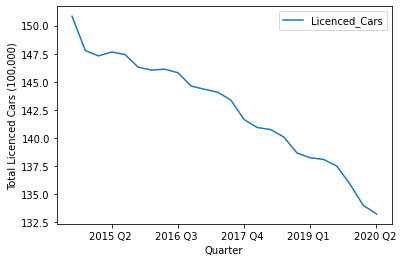

In [348]:
sum_matrix4.plot(x="Year", y="Licenced_Cars")
ax = plt.gca()
ax.invert_xaxis()
plt.xlabel("Quarter")
plt.ylabel("Total Licenced Cars (100,000)")
plt.show()

# New Registration Make/Model 

In [349]:
Registration_Make_Model = pd.read_csv('veh0160_NewRegistration.csv', skiprows = range(0,6), skipfooter=10)

<ipython-input-349-6f3bca4cce95>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  Registration_Make_Model = pd.read_csv('veh0160_NewRegistration.csv', skiprows = range(0,6), skipfooter=10)


In [350]:
Registration_Make_Model = Registration_Make_Model.drop(Registration_Make_Model.iloc[: , 26:], axis = 1) 

In [436]:
Registration_Make_Model[Registration_Make_Model["Model"] == "MEGA CITY ELECTRIC"]

,Make,Model,2020 Q2 UK,2020 Q1 UK,2019 Q4 UK,2019 Q3 UK,2019 Q2 UK,2019 Q1 UK,2018 Q4 UK,2018 Q3 UK,...,2016 Q4 UK,2016 Q3 UK,2016 Q2 UK,2016 Q1 UK,2015 Q4 UK,2015 Q3 UK,2015 Q2 UK,2015 Q1 UK,2014 Q4 UK,2014 Q3 UK
91,AIXAM,MEGA CITY ELECTRIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Graph Sum of New_Licenced_Cars 

In [351]:
Sum = Registration_Make_Model.sum(axis = 0)
Sum = Sum.to_frame()
Sum = Sum.iloc[2:]

In [352]:
Sum = Sum.rename(columns = {0:"New_Licenced_Cars"})
Sum.reset_index(inplace=True)
Sum = Sum.rename(columns = {"index":"Year"})
Sum.head()

,Year,New_Licenced_Cars
0,2020 Q2 UK,171549
1,2020 Q1 UK,491599
2,2019 Q4 UK,458409
3,2019 Q3 UK,601398
4,2019 Q2 UK,576147


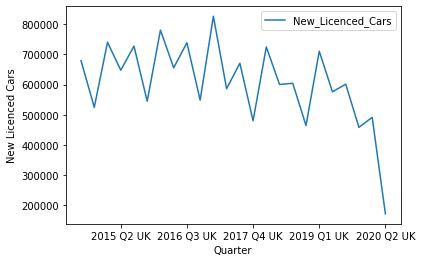

In [353]:
Sum.plot(x="Year", y="New_Licenced_Cars")
ax = plt.gca()
ax.invert_xaxis()
plt.xlabel("Quarter")
plt.ylabel("New Licenced Cars")
plt.show()

# Estimating Driver Mileage from Make/Model

In [444]:
Complete_Car = pd.read_csv('veh0120_Total_Cars.csv', skiprows= range(0,6), skipfooter =10)

<ipython-input-444-b9113c75fb89>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  Complete_Car = pd.read_csv('veh0120_Total_Cars.csv', skiprows= range(0,6), skipfooter =10)


In [445]:
Complete_Car

,Make,Model 1,2020 Q1 UK,2019 Q4 UK,2019 Q3 UK,2019 Q2 UK,2019 Q1 UK,2018 Q4 UK,2018 Q3 UK,2018 Q2 UK,...,2003 Q4,2002 Q4,2001 Q4,2000 Q4,1999 Q4,1998 Q4,1997 Q4,1996 Q4,1995 Q4,1994 Q4
0,ABARTH,124 GT MULTIAIR,18.0,18.0,18.0,18.0,17.0,12.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABARTH,124 GT MULTIAIR AUTO,26.0,26.0,28.0,28.0,24.0,10.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABARTH,124 SPIDER MULTIAIR,978.0,1007.0,1049.0,1054.0,1043.0,1005.0,944.0,848.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABARTH,124 SPIDER MULTIAIR AUTO,679.0,689.0,700.0,688.0,667.0,470.0,413.0,294.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABARTH,124 SPIDER SCORPIONE MULTIAIR,46.0,41.0,58.0,63.0,65.0,61.0,61.0,65.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47820,ZASTAVA,ZLX E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,2.0,3.0,3.0,4.0,7.0,6.0,12.0,19.0
47821,ZENOS,E10,12.0,19.0,24.0,26.0,22.0,22.0,26.0,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47822,ZENOS,MISSING,3.0,5.0,5.0,2.0,1.0,3.0,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47823,ZETOR,MISSING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,2.0,3.0,4.0,2.0,3.0


In [446]:
Complete_Car[Complete_Car["Model 1"] == "MEGA CITY ELECTRIC"]

,Make,Model 1,2020 Q1 UK,2019 Q4 UK,2019 Q3 UK,2019 Q2 UK,2019 Q1 UK,2018 Q4 UK,2018 Q3 UK,2018 Q2 UK,...,2003 Q4,2002 Q4,2001 Q4,2000 Q4,1999 Q4,1998 Q4,1997 Q4,1996 Q4,1995 Q4,1994 Q4
92,AIXAM,MEGA CITY ELECTRIC,7.0,6.0,8.0,10.0,11.0,12.0,14.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [440]:
Complete_Car1 = Complete_Car.drop(Complete_Car.iloc[: , 24:86], axis = 1)
Complete_Car1 = Complete_Car1.dropna()

In [441]:
Miles_Driven = Complete_Car1.drop(Complete_Car1.iloc[:, 0:2], axis = 1)
Miles_Driven.head(5)

,2020 Q1 UK,2019 Q4 UK,2019 Q3 UK,2019 Q2 UK,2019 Q1 UK,2018 Q4 UK,2018 Q3 UK,2018 Q2 UK,2018 Q1 UK,2017 Q4 UK,...,2017 Q1 UK,2016 Q4 UK,2016 Q3 UK,2016 Q2 UK,2016 Q1 UK,2015 Q4 UK,2015 Q3 UK,2015 Q2 UK,2015 Q1 UK,2014 Q4 UK
5,4135.0,4189.0,4244.0,4283.0,4251.0,4286.0,4294.0,4334.0,4372.0,4420.0,...,4447.0,4490.0,4525.0,4568.0,4550.0,4580.0,4574.0,4548.0,4462.0,4421.0
6,567.0,576.0,589.0,582.0,578.0,588.0,604.0,602.0,599.0,592.0,...,608.0,603.0,614.0,615.0,614.0,631.0,627.0,638.0,640.0,640.0
7,349.0,364.0,365.0,356.0,355.0,360.0,360.0,350.0,347.0,362.0,...,363.0,374.0,382.0,378.0,380.0,380.0,373.0,329.0,196.0,16.0
8,105.0,104.0,105.0,105.0,101.0,104.0,104.0,106.0,108.0,111.0,...,112.0,114.0,113.0,111.0,89.0,57.0,26.0,18.0,15.0,2.0
9,84.0,91.0,90.0,91.0,88.0,88.0,93.0,93.0,91.0,94.0,...,87.0,92.0,92.0,94.0,96.0,95.0,95.0,90.0,82.0,78.0


In [ ]:
Miles_Driven

KeyError: 'Model'

In [357]:
## Assumptions 
Average_Total_Miles_Annually = 7600
Average_Total_Miles_Quarterly = 1900

In [358]:
Miles_Driven1 = Miles_Driven * Average_Total_Miles_Quarterly

In [359]:
Miles_Driven1.head(3)

,2020 Q1 UK,2019 Q4 UK,2019 Q3 UK,2019 Q2 UK,2019 Q1 UK,2018 Q4 UK,2018 Q3 UK,2018 Q2 UK,2018 Q1 UK,2017 Q4 UK,...,2017 Q1 UK,2016 Q4 UK,2016 Q3 UK,2016 Q2 UK,2016 Q1 UK,2015 Q4 UK,2015 Q3 UK,2015 Q2 UK,2015 Q1 UK,2014 Q4 UK
5,7856500.0,7959100.0,8063600.0,8137700.0,8076900.0,8143400.0,8158600.0,8234600.0,8306800.0,8398000.0,...,8449300.0,8531000.0,8597500.0,8679200.0,8645000.0,8702000.0,8690600.0,8641200.0,8477800.0,8399900.0
6,1077300.0,1094400.0,1119100.0,1105800.0,1098200.0,1117200.0,1147600.0,1143800.0,1138100.0,1124800.0,...,1155200.0,1145700.0,1166600.0,1168500.0,1166600.0,1198900.0,1191300.0,1212200.0,1216000.0,1216000.0
7,663100.0,691600.0,693500.0,676400.0,674500.0,684000.0,684000.0,665000.0,659300.0,687800.0,...,689700.0,710600.0,725800.0,718200.0,722000.0,722000.0,708700.0,625100.0,372400.0,30400.0


In [ ]:
## Now put add Make and Model to this 

In [360]:
Make_Model = Complete_Car1[["Make","Model 1"]]
Make_Model.head(5)

,Make,Model 1
5,ABARTH,500
6,ABARTH,500 C
7,ABARTH,500 CUSTOM
8,ABARTH,500 CUSTOM S-A
9,ABARTH,500 S-A


In [361]:
Model_Miles = pd.concat([Make_Model, Miles_Driven1], axis =1, sort = False)

In [362]:
Model_Miles.sum(axis = 0, skipna = True) 

Make          ABARTHABARTHABARTHABARTHABARTHABARTHABARTHABAR...
Model 1       500500 C500 CUSTOM500 CUSTOM S-A500 S-A500C500...
2020 Q1 UK                                          4.88316e+10
2019 Q4 UK                                          4.98271e+10
2019 Q3 UK                                          5.06377e+10
2019 Q2 UK                                            5.127e+10
2019 Q1 UK                                          5.17774e+10
2018 Q4 UK                                          5.24665e+10
2018 Q3 UK                                          5.32145e+10
2018 Q2 UK                                          5.37921e+10
2018 Q1 UK                                          5.42617e+10
2017 Q4 UK                                          5.49096e+10
2017 Q3 UK                                           5.5701e+10
2017 Q2 UK                                          5.62191e+10
2017 Q1 UK                                          5.66087e+10
2016 Q4 UK                              

In [367]:
Model_Miles

,Make,Model 1,2020 Q1 UK,2019 Q4 UK,2019 Q3 UK,2019 Q2 UK,2019 Q1 UK,2018 Q4 UK,2018 Q3 UK,2018 Q2 UK,...,2017 Q1 UK,2016 Q4 UK,2016 Q3 UK,2016 Q2 UK,2016 Q1 UK,2015 Q4 UK,2015 Q3 UK,2015 Q2 UK,2015 Q1 UK,2014 Q4 UK
5,ABARTH,500,7856500.0,7959100.0,8063600.0,8137700.0,8076900.0,8143400.0,8158600.0,8234600.0,...,8449300.0,8531000.0,8597500.0,8679200.0,8645000.0,8702000.0,8690600.0,8641200.0,8477800.0,8399900.0
6,ABARTH,500 C,1077300.0,1094400.0,1119100.0,1105800.0,1098200.0,1117200.0,1147600.0,1143800.0,...,1155200.0,1145700.0,1166600.0,1168500.0,1166600.0,1198900.0,1191300.0,1212200.0,1216000.0,1216000.0
7,ABARTH,500 CUSTOM,663100.0,691600.0,693500.0,676400.0,674500.0,684000.0,684000.0,665000.0,...,689700.0,710600.0,725800.0,718200.0,722000.0,722000.0,708700.0,625100.0,372400.0,30400.0
8,ABARTH,500 CUSTOM S-A,199500.0,197600.0,199500.0,199500.0,191900.0,197600.0,197600.0,201400.0,...,212800.0,216600.0,214700.0,210900.0,169100.0,108300.0,49400.0,34200.0,28500.0,3800.0
9,ABARTH,500 S-A,159600.0,172900.0,171000.0,172900.0,167200.0,167200.0,176700.0,176700.0,...,165300.0,174800.0,174800.0,178600.0,182400.0,180500.0,180500.0,171000.0,155800.0,148200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47797,ZASTAVA,YUGO 45,11400.0,11400.0,11400.0,9500.0,15200.0,15200.0,15200.0,15200.0,...,19000.0,19000.0,19000.0,17100.0,19000.0,19000.0,20900.0,20900.0,17100.0,19000.0
47806,ZASTAVA,YUGO 55A,5700.0,5700.0,5700.0,5700.0,5700.0,5700.0,5700.0,5700.0,...,5700.0,5700.0,5700.0,5700.0,5700.0,5700.0,5700.0,5700.0,5700.0,5700.0
47812,ZASTAVA,YUGO TEMPO,1900.0,1900.0,1900.0,1900.0,3800.0,3800.0,3800.0,5700.0,...,5700.0,7600.0,5700.0,3800.0,5700.0,5700.0,5700.0,5700.0,3800.0,5700.0
47821,ZENOS,E10,22800.0,36100.0,45600.0,49400.0,41800.0,41800.0,49400.0,45600.0,...,55100.0,60800.0,62700.0,62700.0,49400.0,38000.0,34200.0,13300.0,3800.0,3800.0


# Import Covid Travelling Dataset

In [377]:
Covid_19 = pd.read_csv('COVID-19-transport-use-statistics.csv', skiprows= range(0,6), skipfooter=37, parse_dates= ["Date1\n(weekends and bank holidays in grey)"]) 

<ipython-input-377-29220eabea7f>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  Covid_19 = pd.read_csv('COVID-19-transport-use-statistics.csv', skiprows= range(0,6), skipfooter=37, parse_dates= ["Date1\n(weekends and bank holidays in grey)"])


In [378]:
Covid_19.tail(4)

,Date1\n(weekends and bank holidays in grey),Cars2,Light Commercial Vehicles2,Heavy Goods Vehicles2,All motor vehicles2,"National Rail3,4",Transport for London Tube5,"Transport for London Bus5,7","Bus (excl. London)6,8,9","Cycling10,11",...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
257,2020-11-13,71%,86%,103%,76%,p23%4,23%,49%,46%,88%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
258,2020-11-14,61%,77%,106%,65%,p23%4,18%,38%,32%,..,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
259,2020-11-15,60%,76%,108%,63%,p24%4,19%,38%,35%,..,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,2020-11-16,71%,92%,106%,78%,p24%4,24%,49%,48%,..,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [379]:
Covid_19 = Covid_19[["Date1\n(weekends and bank holidays in grey)", "Cars2"]]
Covid_19 = Covid_19.rename(columns = {"Date1\n(weekends and bank holidays in grey)":"Date", "Cars2":"Cars"})

Aggregate Date to quarterly values 
Assumptions: 
Q1 = 01/01 - 31/03
Q2 = 01/04 - 30/06
Q3 = 01/07 - 30/09
Q4 = 01/10 - 31/12

In [380]:
Covid_19['Date'] = Covid_19['Date'].dt.to_period("Q")


In [381]:
Covid_19["Cars"] = (Covid_19["Cars"]
                    .astype("string")
                    .str.replace('%', '')
                    .astype("float")
)

In [383]:
Covid_19["Cars"]

0      103.0
1      102.0
2      101.0
3      101.0
4      100.0
       ...  
256     70.0
257     71.0
258     61.0
259     60.0
260     71.0
Name: Cars, Length: 261, dtype: float64

In [384]:
print(Covid_19["Cars"].mean())
print(Covid_19["Cars"].median())

72.48659003831418
81.0


In [385]:
Q1 = Covid_19[Covid_19["Date"] == "2020Q1"]
Q2 = Covid_19[Covid_19["Date"] == "2020Q2"]
Q3 = Covid_19[Covid_19["Date"] == "2020Q3"]
Q4 = Covid_19[Covid_19["Date"] == "2020Q4"]

In [386]:
print(Q1["Cars"].median())
print(Q2["Cars"].median())
print(Q3["Cars"].median())
print(Q4["Cars"].median())

76.5
61.0
88.0
83.0


# Accounting for Covid Ridership Shock

In [388]:
#Assumptions: 
Q1 = 0.93
Q2 = 0.50
Q3 = 0.89
Q4 = 0.84

In [389]:
Model_Miles["2020 Q1 UK"] = Model_Miles["2020 Q1 UK"] * Q1

In [311]:
Model_Miles.head(5)

,Make,Model 1,2020 Q1 UK,2019 Q4 UK,2019 Q3 UK,2019 Q2 UK,2019 Q1 UK,2018 Q4 UK,2018 Q3 UK,2018 Q2 UK,...,2017 Q1 UK,2016 Q4 UK,2016 Q3 UK,2016 Q2 UK,2016 Q1 UK,2015 Q4 UK,2015 Q3 UK,2015 Q2 UK,2015 Q1 UK,2014 Q4 UK
5,ABARTH,500,7306545.0,7959100.0,8063600.0,8137700.0,8076900.0,8143400.0,8158600.0,8234600.0,...,8449300.0,8531000.0,8597500.0,8679200.0,8645000.0,8702000.0,8690600.0,8641200.0,8477800.0,8399900.0
6,ABARTH,500 C,1001889.0,1094400.0,1119100.0,1105800.0,1098200.0,1117200.0,1147600.0,1143800.0,...,1155200.0,1145700.0,1166600.0,1168500.0,1166600.0,1198900.0,1191300.0,1212200.0,1216000.0,1216000.0
7,ABARTH,500 CUSTOM,616683.0,691600.0,693500.0,676400.0,674500.0,684000.0,684000.0,665000.0,...,689700.0,710600.0,725800.0,718200.0,722000.0,722000.0,708700.0,625100.0,372400.0,30400.0
8,ABARTH,500 CUSTOM S-A,185535.0,197600.0,199500.0,199500.0,191900.0,197600.0,197600.0,201400.0,...,212800.0,216600.0,214700.0,210900.0,169100.0,108300.0,49400.0,34200.0,28500.0,3800.0
9,ABARTH,500 S-A,148428.0,172900.0,171000.0,172900.0,167200.0,167200.0,176700.0,176700.0,...,165300.0,174800.0,174800.0,178600.0,182400.0,180500.0,180500.0,171000.0,155800.0,148200.0


# Link with BEV document and Fuel type document

In [390]:
Fuel_Type = pd.read_csv('veh0220_MakeModel_FuelType.csv', skiprows= range(0,6), skipfooter=10) 
Electric = pd.read_csv('EV_Dataset.csv') 

<ipython-input-390-08c73fe4b550>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  Fuel_Type = pd.read_csv('veh0220_MakeModel_FuelType.csv', skiprows= range(0,6), skipfooter=10)


In [392]:
Fuel_Type = Fuel_Type.drop(Fuel_Type.iloc[:, 3:], axis= 1)

In [393]:
Fuel_Type["Fuel Type"] = Fuel_Type["Fuel Type"].astype('category')
Fuel_Type[["Make", "Model 1"]] = Fuel_Type[["Make", "Model 1"]].astype('string')

In [394]:
Other = Fuel_Type[Fuel_Type["Fuel Type"] == "Other"] 
Other = Other.rename(columns= {"Model 1": "Model"})

In [395]:
Electric = Electric[["Company", "Model", "EV_type"]]
Electric = Electric.rename(columns = {"Company":"Make"})

In [396]:
Electric["EV_type"] = Electric["EV_type"].astype('category')
Electric[["Make", "Model"]] = Electric[["Make", "Model"]].astype('string')

In [397]:
Electric = Electric.sort_values(["Make", "Model"], ascending = True)

In [398]:
Test1 = pd.merge(Other, Electric, on = ["Make", "Model"], how = 'outer')
Test1 = Test1[Test1['Fuel Type'].notna()]

In [399]:
Test1["EV_type"] = Test1["EV_type"].astype('string')
Test1 = Test1.replace(np.nan, 'Other', regex=True)
Test1 = Test1[["Make", "Model", "EV_type"]]
Test1 = Test1.rename(columns = {"EV_type":"Fuel Type"})
Test1

,Make,Model,Fuel Type
0,ABARTH,GRANDE PUNTO 155 BHP,Other
1,AIXAM,MEGA CITY ELECTRIC,BEV
2,AIXAM,MEGA CITY+ AUTO,BEV
3,ALFA ROMEO,147 T SPARK LUSSO,Other
4,ALFA ROMEO,156 1.8 T.SPARK,Other
...,...,...,...
4703,VOLVO,XC90 T8 INSCRIPTION T-ENGINE A,Other
4704,VOLVO,XC90 T8 MOMENTUM TWIN ENGINE A,Other
4705,VOLVO,XC90 T8 R-DESIGN TWIN ENGINE A,Other
4706,WOLSELEY,4/44,Other


In [400]:
ICE = Fuel_Type[Fuel_Type["Fuel Type"] != "Other"]
ICE = ICE.rename(columns= {"Model 1": "Model"})
ICE

,Make,Model,Fuel Type
0,ABARTH,124 GT MULTIAIR,Petrol
1,ABARTH,124 GT MULTIAIR AUTO,Petrol
2,ABARTH,124 SPIDER MULTIAIR,Petrol
3,ABARTH,124 SPIDER MULTIAIR AUTO,Petrol
4,ABARTH,124 SPIDER SCORPIONE MULTIAIR,Petrol
...,...,...,...
50669,ZASTAVA,YUGO TEMPO GLS,Petrol
50670,ZENOS,E10,Petrol
50671,ZENOS,Missing,Petrol
50672,ZHENHUA,Missing,Diesel


In [401]:
ICE_BEV = pd.concat([ICE, Test1], ignore_index=True, sort=False)

In [402]:
ICE_BEV["Fuel Type"] = ICE_BEV["Fuel Type"].astype("category")

In [403]:
ICE_BEV["Fuel Type"]

0        Petrol
1        Petrol
2        Petrol
3        Petrol
4        Petrol
          ...  
50669     Other
50670     Other
50671     Other
50672     Other
50673     Other
Name: Fuel Type, Length: 50674, dtype: category
Categories (8, object): ['BEV', 'Diesel', 'HEV', 'ICE', 'ICE/PHEV', 'Other', 'PHEV', 'Petrol']

In [405]:
ICE_BEV

,Make,Model,Fuel Type
0,ABARTH,124 GT MULTIAIR,Petrol
1,ABARTH,124 GT MULTIAIR AUTO,Petrol
2,ABARTH,124 SPIDER MULTIAIR,Petrol
3,ABARTH,124 SPIDER MULTIAIR AUTO,Petrol
4,ABARTH,124 SPIDER SCORPIONE MULTIAIR,Petrol
...,...,...,...
50669,VOLVO,XC90 T8 INSCRIPTION T-ENGINE A,Other
50670,VOLVO,XC90 T8 MOMENTUM TWIN ENGINE A,Other
50671,VOLVO,XC90 T8 R-DESIGN TWIN ENGINE A,Other
50672,WOLSELEY,4/44,Other


In [423]:
ICE_BEV[ICE_BEV["Model"].str.contains("ZOE")]

,Make,Model,Fuel Type
48945,RENAULT,ZOE DYN NAV QUICK CHRG ZE 40 A,Other
48946,RENAULT,ZOE DYN NAV RAPID CHARGE A,Other
48947,RENAULT,ZOE DYNAMIQUE INTENS AUTO,Other
48948,RENAULT,ZOE DYNAMIQUE NAV AUTO,Other
48949,RENAULT,ZOE DYNAMIQUE NAV ZE 40 AUTO,Other
48950,RENAULT,ZOE DYNAMIQUE ZEN AUTO,Other
48951,RENAULT,ZOE EXPRESSION AUTO,Other
48952,RENAULT,ZOE EXPRESSION NAV AUTO,Other
48953,RENAULT,ZOE EXPRESSION NAV ZE AUTO,Other
48954,RENAULT,ZOE I DYN NAV QUICK CH ZE 40 A,Other


# Merge Car Type with Estimate for Miles Driven from Total Number of Cars

In [424]:
Model_Miles = Model_Miles.rename(columns = {"Model 1": "Model"})

In [425]:
Miles_Fuel_Type = pd.merge(Model_Miles, ICE_BEV, on = ["Make", "Model"], how = 'inner')
cols = list(Miles_Fuel_Type.columns.values)
print(cols)

['Make', 'Model', '2020 Q1 UK', '2019 Q4 UK', '2019 Q3 UK', '2019 Q2 UK', '2019 Q1 UK', '2018 Q4 UK', '2018 Q3 UK', '2018 Q2 UK', '2018 Q1 UK', '2017 Q4 UK', '2017 Q3 UK', '2017 Q2 UK', '2017 Q1 UK', '2016 Q4 UK', '2016 Q3 UK', '2016 Q2 UK', '2016 Q1 UK', '2015 Q4 UK', '2015 Q3 UK', '2015 Q2 UK', '2015 Q1 UK', '2014 Q4 UK', 'Fuel Type']


In [427]:
Miles_Fuel_Type = Miles_Fuel_Type[['Make', 'Model','Fuel Type', '2020 Q1 UK', '2019 Q4 UK', '2019 Q3 UK', '2019 Q2 UK', '2019 Q1 UK', '2018 Q4 UK', '2018 Q3 UK', '2018 Q2 UK', '2018 Q1 UK', '2017 Q4 UK',
         '2017 Q3 UK', '2017 Q2 UK', '2017 Q1 UK', '2016 Q4 UK', '2016 Q3 UK', '2016 Q2 UK', '2016 Q1 UK', '2015 Q4 UK', '2015 Q3 UK', '2015 Q2 UK', '2015 Q1 UK', '2014 Q4 UK']]
Miles_Fuel_Type

,Make,Model,Fuel Type,2020 Q1 UK,2019 Q4 UK,2019 Q3 UK,2019 Q2 UK,2019 Q1 UK,2018 Q4 UK,2018 Q3 UK,...,2017 Q1 UK,2016 Q4 UK,2016 Q3 UK,2016 Q2 UK,2016 Q1 UK,2015 Q4 UK,2015 Q3 UK,2015 Q2 UK,2015 Q1 UK,2014 Q4 UK
0,ABARTH,500,Petrol,7306545.0,7959100.0,8063600.0,8137700.0,8076900.0,8143400.0,8158600.0,...,8449300.0,8531000.0,8597500.0,8679200.0,8645000.0,8702000.0,8690600.0,8641200.0,8477800.0,8399900.0
1,ABARTH,500 C,Petrol,1001889.0,1094400.0,1119100.0,1105800.0,1098200.0,1117200.0,1147600.0,...,1155200.0,1145700.0,1166600.0,1168500.0,1166600.0,1198900.0,1191300.0,1212200.0,1216000.0,1216000.0
2,ABARTH,500 CUSTOM,Petrol,616683.0,691600.0,693500.0,676400.0,674500.0,684000.0,684000.0,...,689700.0,710600.0,725800.0,718200.0,722000.0,722000.0,708700.0,625100.0,372400.0,30400.0
3,ABARTH,500 CUSTOM S-A,Petrol,185535.0,197600.0,199500.0,199500.0,191900.0,197600.0,197600.0,...,212800.0,216600.0,214700.0,210900.0,169100.0,108300.0,49400.0,34200.0,28500.0,3800.0
4,ABARTH,500 S-A,Petrol,148428.0,172900.0,171000.0,172900.0,167200.0,167200.0,176700.0,...,165300.0,174800.0,174800.0,178600.0,182400.0,180500.0,180500.0,171000.0,155800.0,148200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38398,YAMAHA,YFM 400,Petrol,1767.0,1900.0,1900.0,1900.0,1900.0,1900.0,1900.0,...,1900.0,1900.0,1900.0,1900.0,1900.0,1900.0,1900.0,1900.0,1900.0,1900.0
38399,ZASTAVA,YUGO 45,Petrol,10602.0,11400.0,11400.0,9500.0,15200.0,15200.0,15200.0,...,19000.0,19000.0,19000.0,17100.0,19000.0,19000.0,20900.0,20900.0,17100.0,19000.0
38400,ZASTAVA,YUGO 55A,Petrol,5301.0,5700.0,5700.0,5700.0,5700.0,5700.0,5700.0,...,5700.0,5700.0,5700.0,5700.0,5700.0,5700.0,5700.0,5700.0,5700.0,5700.0
38401,ZASTAVA,YUGO TEMPO,Petrol,1767.0,1900.0,1900.0,1900.0,3800.0,3800.0,3800.0,...,5700.0,7600.0,5700.0,3800.0,5700.0,5700.0,5700.0,5700.0,3800.0,5700.0


In [437]:
Model_Miles[Model_Miles["Model"] == "MEGA CITY ELECTRIC"]

,Make,Model,2020 Q1 UK,2019 Q4 UK,2019 Q3 UK,2019 Q2 UK,2019 Q1 UK,2018 Q4 UK,2018 Q3 UK,2018 Q2 UK,...,2017 Q1 UK,2016 Q4 UK,2016 Q3 UK,2016 Q2 UK,2016 Q1 UK,2015 Q4 UK,2015 Q3 UK,2015 Q2 UK,2015 Q1 UK,2014 Q4 UK
92,AIXAM,MEGA CITY ELECTRIC,12369.0,11400.0,15200.0,19000.0,20900.0,22800.0,26600.0,26600.0,...,55100.0,60800.0,68400.0,70300.0,85500.0,89300.0,93100.0,102600.0,102600.0,110200.0


In [447]:
Miles_Fuel_Type[Miles_Fuel_Type["Fuel Type"] == "BEV"]

,Make,Model,Fuel Type,2020 Q1 UK,2019 Q4 UK,2019 Q3 UK,2019 Q2 UK,2019 Q1 UK,2018 Q4 UK,2018 Q3 UK,...,2017 Q1 UK,2016 Q4 UK,2016 Q3 UK,2016 Q2 UK,2016 Q1 UK,2015 Q4 UK,2015 Q3 UK,2015 Q2 UK,2015 Q1 UK,2014 Q4 UK
37,AIXAM,MEGA CITY ELECTRIC,BEV,12369.0,11400.0,15200.0,19000.0,20900.0,22800.0,26600.0,...,55100.0,60800.0,68400.0,70300.0,85500.0,89300.0,93100.0,102600.0,102600.0,110200.0
17994,MIA,C,BEV,7068.0,9500.0,9500.0,11400.0,13300.0,13300.0,15200.0,...,15200.0,15200.0,17100.0,17100.0,17100.0,15200.0,15200.0,13300.0,13300.0,13300.0
18481,MITSUBISHI,I-MIEV KEIKO,BEV,54777.0,57000.0,57000.0,60800.0,55100.0,60800.0,57000.0,...,60800.0,62700.0,57000.0,58900.0,58900.0,53200.0,57000.0,60800.0,62700.0,64600.0
19262,NISSAN,LEAF,BEV,2424324.0,2667600.0,2703700.0,2698000.0,2711300.0,2745500.0,2756900.0,...,2762600.0,2794900.0,2798700.0,2703700.0,2819600.0,2973500.0,2954500.0,2916500.0,2988700.0,3300300.0
19263,NISSAN,LEAF ACENTA,BEV,10322814.0,10554500.0,10159300.0,9648200.0,9638700.0,9249200.0,9049700.0,...,7271300.0,7556300.0,7782400.0,7877400.0,8192800.0,8428400.0,8141500.0,7913500.0,7155400.0,5538500.0
19264,NISSAN,LEAF TEKNA,BEV,14222583.0,14098000.0,13102400.0,12131500.0,11453200.0,10231500.0,9273900.0,...,5954600.0,6505600.0,6680400.0,6876100.0,6995800.0,6942600.0,6524600.0,5840600.0,4672100.0,3368700.0
20422,PEUGEOT,106 ELECTRIC AUTO,BEV,5301.0,5700.0,5700.0,3800.0,1900.0,3800.0,7600.0,...,11400.0,11400.0,11400.0,11400.0,13300.0,15200.0,15200.0,15200.0,15200.0,15200.0
22193,PEUGEOT,ION,BEV,708567.0,756200.0,761900.0,794200.0,803700.0,807500.0,813200.0,...,794200.0,794200.0,784700.0,769500.0,727700.0,710600.0,704900.0,699200.0,714400.0,699200.0
25154,RENAULT,TWIZY COLOUR,BEV,192603.0,214700.0,226100.0,226100.0,228000.0,239400.0,247000.0,...,269800.0,266000.0,266000.0,271700.0,262200.0,250800.0,267900.0,281200.0,277400.0,267900.0
25155,RENAULT,TWIZY TECHNIC,BEV,272118.0,298300.0,305900.0,296400.0,309700.0,313500.0,313500.0,...,345800.0,345800.0,347700.0,355300.0,364800.0,351500.0,355300.0,351500.0,326800.0,296400.0


# Merge Car Type with Estimate for Miles Driven from number of newly Licenced cars

In [430]:
Registration_Make_Model = Registration_Make_Model.rename(columns = {"Model 1": "Model"})
Registration_Make_Model

,Make,Model,2020 Q2 UK,2020 Q1 UK,2019 Q4 UK,2019 Q3 UK,2019 Q2 UK,2019 Q1 UK,2018 Q4 UK,2018 Q3 UK,...,2016 Q4 UK,2016 Q3 UK,2016 Q2 UK,2016 Q1 UK,2015 Q4 UK,2015 Q3 UK,2015 Q2 UK,2015 Q1 UK,2014 Q4 UK,2014 Q3 UK
0,ABARTH,124 GT MULTIAIR,NaN,NaN,NaN,NaN,NaN,8.0,10.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABARTH,124 GT MULTIAIR AUTO,NaN,NaN,NaN,NaN,2.0,12.0,14.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABARTH,124 SPIDER MULTIAIR,NaN,NaN,NaN,NaN,1.0,34.0,73.0,102.0,...,59.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABARTH,124 SPIDER MULTIAIR AUTO,NaN,NaN,NaN,1.0,15.0,191.0,94.0,123.0,...,10.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABARTH,124 SPIDER SCORPIONE MULTIAIR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43595,ZENOS,MISSING,NaN,NaN,1.0,2.0,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43596,ZETOR,MISSING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43597,ZHENHUA,MISSING,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0
43598,ZINGYUE,MISSING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [432]:
New_Registration_Fuel_Type = pd.merge(Registration_Make_Model, ICE_BEV, on = ["Make", "Model"], how = 'inner')
cols = list(New_Registration_Fuel_Type.columns.values)
print(cols)

['Make', 'Model', '2020 Q2 UK', '2020 Q1 UK', '2019 Q4 UK', '2019 Q3 UK', '2019 Q2 UK', '2019 Q1 UK', '2018 Q4 UK', '2018 Q3 UK', '2018 Q2 UK', '2018 Q1 UK', '2017 Q4 UK', '2017 Q3 UK', '2017 Q2 UK', '2017 Q1 UK', '2016 Q4 UK', '2016 Q3 UK', '2016 Q2 UK', '2016 Q1 UK', '2015 Q4 UK', '2015 Q3 UK', '2015 Q2 UK', '2015 Q1 UK', '2014 Q4 UK', '2014 Q3 UK', 'Fuel Type']


In [433]:
New_Registration_Fuel_Type = New_Registration_Fuel_Type[['Make', 'Model','Fuel Type', '2020 Q1 UK', '2019 Q4 UK', '2019 Q3 UK', '2019 Q2 UK', '2019 Q1 UK', '2018 Q4 UK', '2018 Q3 UK', '2018 Q2 UK', '2018 Q1 UK', '2017 Q4 UK',
         '2017 Q3 UK', '2017 Q2 UK', '2017 Q1 UK', '2016 Q4 UK', '2016 Q3 UK', '2016 Q2 UK', '2016 Q1 UK', '2015 Q4 UK', '2015 Q3 UK', '2015 Q2 UK', '2015 Q1 UK', '2014 Q4 UK']]
New_Registration_Fuel_Type

,Make,Model,Fuel Type,2020 Q1 UK,2019 Q4 UK,2019 Q3 UK,2019 Q2 UK,2019 Q1 UK,2018 Q4 UK,2018 Q3 UK,...,2017 Q1 UK,2016 Q4 UK,2016 Q3 UK,2016 Q2 UK,2016 Q1 UK,2015 Q4 UK,2015 Q3 UK,2015 Q2 UK,2015 Q1 UK,2014 Q4 UK
0,ABARTH,124 GT MULTIAIR,Petrol,NaN,NaN,NaN,NaN,8.0,10.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABARTH,124 GT MULTIAIR AUTO,Petrol,NaN,NaN,NaN,2.0,12.0,14.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABARTH,124 SPIDER MULTIAIR,Petrol,NaN,NaN,NaN,1.0,34.0,73.0,102.0,...,104.0,59.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABARTH,124 SPIDER MULTIAIR AUTO,Petrol,NaN,NaN,1.0,15.0,191.0,94.0,123.0,...,26.0,10.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABARTH,124 SPIDER SCORPIONE MULTIAIR,Petrol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47033,X-BOW,X-BOW,Petrol,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0
47034,YAMAHA,YFM 350 R (QUAD BIKE),Petrol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47035,YAMAHA,YFM 400,Petrol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47036,YAMAHA,YFM 660,Petrol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [451]:
New_Registration_Fuel_Type[New_Registration_Fuel_Type["Fuel Type"] == "BEV"]

,Make,Model,Fuel Type,2020 Q1 UK,2019 Q4 UK,2019 Q3 UK,2019 Q2 UK,2019 Q1 UK,2018 Q4 UK,2018 Q3 UK,...,2017 Q1 UK,2016 Q4 UK,2016 Q3 UK,2016 Q2 UK,2016 Q1 UK,2015 Q4 UK,2015 Q3 UK,2015 Q2 UK,2015 Q1 UK,2014 Q4 UK
70,AIXAM,MEGA CITY ELECTRIC,BEV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,AIXAM,MEGA CITY+ AUTO,BEV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22955,MIA,C,BEV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23606,MITSUBISHI,I-MIEV KEIKO,BEV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24455,NISSAN,LEAF,BEV,2.0,NaN,9.0,2.0,5.0,5.0,NaN,...,1.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,1.0,1.0
24458,NISSAN,LEAF ACENTA,BEV,259.0,288.0,309.0,44.0,279.0,113.0,154.0,...,1.0,1.0,1.0,1.0,29.0,257.0,601.0,539.0,903.0,531.0
24466,NISSAN,LEAF TEKNA,BEV,680.0,639.0,601.0,380.0,713.0,552.0,433.0,...,NaN,1.0,5.0,20.0,77.0,284.0,699.0,645.0,727.0,489.0
25715,PEUGEOT,106 ELECTRIC AUTO,BEV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27836,PEUGEOT,ION,BEV,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,4.0,4.0,7.0,16.0,10.0,10.0,3.0,1.0,10.0,7.0
31302,RENAULT,TWIZY COLOUR,BEV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,2.0,NaN,1.0,NaN,8.0,NaN


In [ ]:
Miles_Fuel_Type[Miles_Fuel_Type["Fuel Type"] == "BEV"]